
# Neuronale Netze von Grund auf

In dieser Übung wollen wir uns mit der Programmierung eines eigenens Neuronalen Netzes mittels numpy beschäftigen um uns ein bisschen besser mit den Grundelementen auseindanderzusetzen. Später werden wir ein kleines Klassifkiationsproblem mit Pytorch anschauen.


Zuerst importieren wir wieder alle Pakete, welche wir für diese Aufgabe benötigen

- [numpy](www.numpy.org) ist eine Bibliothek für numerische Berechnungen
- [matplotlib](http://matplotlib.org) ist eine Bibliothek zum Erstellen von Plots

Zuletzt setzen wir den numpy Seed um deterministisches Verhalten zu erhalten.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Ablauf des Lernverfahrens

Prinzipiell besteht unsere Optimierung aus folgenden Schritten


1.   Initialisierung der Parameter $W_{i,j},b_j$
2.   Iterationsschritt mit Berechnung des Ausgangs $y$, $\epsilon$ und Cachen von Zwischenergebnissen (Forward Pass)
3.   Iterationsschritt mit Bestimmung des Gradienten $dW_{i,j}, db_j$ bezüglich der einzelnen Parameter
4.   Parameterupdate
5.   Wiederhole bis Abbruchkriterium erfüllt (hier Anzahl an Trainingsepochen erreicht)


Wir werden zuerst einige Hilfsfunktionen für ein einfaches 2-Layer Perceptron implementieren. Danach werden wir das ganze für n-Layer verallgemeinern und das neuronale Netz als eigenes Objekt betrachten.


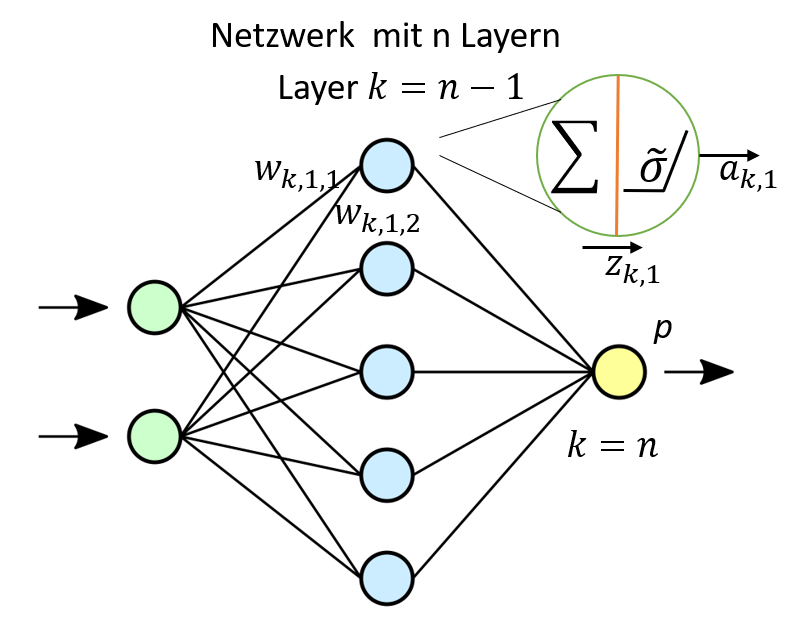

# Aufgabe 1: Hier ist der Stift gefragt

Wir nehmen an wir haben die oben visualisierte Netzform mit $n$ Layern (ein Multilayer-Perzeptron) mit ReLU Aktivierung in den tiefen Layern und Sigmoid Aktivierung in der Ausgabeschicht vorliegen. Der Ausgang ist eine Wahrscheinlichkeit $p$ und der Eingang für die folgende Aufgabe unerheblich.

Zur Notation. Für jede Schicht $k$ gibt es eine Gewichtsmatrik $\mathbf{W}_k=\left[ {\begin{array}{ccc}
    w_{k,1,1} & w_{k,1,2} & ...\\
    w_{k,2,1} & w_{k,2,2}  & ...\\
    \vdots    & \vdots     &\ddots
  \end{array} } \right]$ mit Gewichten $w_{kji}$ für den $i$-ten Eingang des $j$-ten Neurons und einen Biasvektor $\mathbf{b}_k = \left[ {\begin{array}{c}
    b_{k,1}  \\
    b_{k,2}  \\
    \vdots    
  \end{array} } \right]$ mit Biases $b_{kj}$.

Berechne die Gradienten $\frac{∂L}{∂w_{k,j,i}}$ für die Gewichte $w_{n,j,i},w_{n-1,j,i}$ der letzten beiden Layer des gegebenen Netzes mittels Backpropagation (Kettenregel). Berechne außerdem $\frac{∂L}{∂a_{n-2,i}}$. Die Kostenfunktion ist gegeben durch die Binary Cross Entropy

$L_{\text{BLE}} = -y\log(p)-(1-y)\log(1-p)$, wobei $p$ die Ausgabe des letzten Neurons ist und $y$ das gegebene wahre Label.

*Tipp*: Berechne zuerst $\frac{∂L}{∂\mathbf{z}_n}$, also die die Ableitung der Loss-Funktion nach dem Ausgang der letzten linearen Funktion. Der Ergebnisterm sollte zusammengefasst lediglich die Differenz von 2 Größen sein. Denke auch daran die Berechnungen so aufzustellen, dass vorherige Berechnungen wieder verwendet werden können.

Sigmoid: $\sigma(x) = \frac{1}{1+\mathrm{e}^{-x}}$

Reminder: Die Kettenregel bei der partiellen Ableitungen einer Funktion $f(u,v)$ lautet $\frac{∂f}{∂t}= \frac{∂f}{∂u}\frac{∂u}{∂t}+\frac{∂f}{∂v}\frac{∂v}{∂t}$

# Aufgabe 2: Initialisierung

Das 2-Layer-Perzeptron ist darstellbar als eine Funktion $y = f(x|\mathbf{W}_1,b_1,\mathbf{W}_2,b_2)$. Zuerst müssen die Parameter initialisiert werden. Die Art der Initialisierung ist dabei nicht egal, sondern spielt eine wichtige Rolle bei der Konvergenz der Optimierung. Es gibt verschiedene Verfahren die Parameter zu initialisieren (z.B. Konstanten, Gleichverteilte Zufallsvariablen, Normalverteilte Zufallsvariablen). Wichtig ist dabei vor allem, dass die einzelnen Parameter leicht unterschiedlich sind und keine Symmetrie im Netzwerk mehr besteht, wie es bei der Initialisierung der Gewichte mit $0$ der Fall wäre. Da bei einem vollständig verbundenen Netz alle Neuronen gleichermaßen von den Eingängen abhängen, könnten diese sich bei der Optimierung lediglich in die gleiche Richtung verändern und würden niemals voneinander abweichen. Die sogennante *He*-Initialisierung eignet sich beispielsweise gut für Netze mit *ReLU*-Aktivierungsfunktion: $w_i \sim \mathcal{N}(\mu=0,\sigma=\sqrt{(2/n)}$

Wir beschränken uns in der Übung auf die zufällige Initialisierung von $\mathbf{W}$ mit kleinen Werten und der Initialisierung von $\mathbf{b}$ mit Nullen, da das in der Regel gut funktioniert.

Ergänze die Initialisierung für das 2-Layer-Perzeptron

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argumente:
    n_x -- Größe des Input-Layers
    n_h -- Größe des Hidden-Layers
    n_y -- Größe des Output-Layers

    Returns:
    parameters -- python dictionary mit den Parametern:
                    W1 -- weight Matrix der From (n_h, n_x)
                    b1 -- bias Vektor der Form (n_h, 1)
                    W2 -- weigth Matrix der Form (n_y, n_h)
                    b2 -- bias Vektor der Form (n_y, 1)
    """

    # --- DEIN CODE ---




    # -----------------

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

# Aufgabe 3: Aktivierungsfunktionen

Als Aktivierungsfunktionen wollen wir Sigmoid und ReLU implementieren. Für den Backward-Schritt brauchen wir später auch die Ableitungen.
Achte darauf, dass die Eingänge Vektoren sind.

Die Ableitung der Loss-Funktion nach einer Variablen $\mathbf{x}$ (Vektor) ,  $\dfrac{\mathrm{d}L}{\mathrm{d}\mathbf{x}}$, ist im folgenden im Code immer mit `dx` bezeichnet.

In [ ]:
def sigmoid(Z):
    """
    numpy-Implementierung der sigmoid-Funktion

    Arguments:
    Z -- ndarray

    Returns:
    A -- Ausgang von sigmoid(Z), gleiche Dimensionen wie Z
    cache -- cached Z, nützlich während backpropagation
    """

    # --- DEIN CODE ---



    # -----------------

    return A, cache

def relu(Z):
    """
    numpy-Implementierung der ReLU-Funktion

    Arguments:
    Z -- ndarray

    Returns:
    A -- Ausgang von relu(Z), gleiche Dimensionen wie Z
    cache -- cached Z, nützlich während backpropagation
    """

    # --- DEIN CODE ---



    # -----------------

    return A, cache


def relu_backward(dA, cache):
    """
    Implementiert backward propagation für einzelne RELU Einheit.

    Arguments:
    dA -- post-activation gradient, beliebige Dimensionen
    cache -- 'Z' für effiziente backward propagation

    Returns:
    dZ -- Gradient der Kostenfunktion bezüglich Z
    """

    # --- DEIN CODE ---


    # -----------------

    return dZ

def sigmoid_backward(dA, cache):
    """
    Implementiert backward propagation für einzelne RELU Einheit.

    Arguments:
    dA -- post-activation gradient, beliebige Dimensionen
    cache -- 'Z' für effiziente backward propagation

    Returns:
    dZ -- Gradient der Kostenfunktion bezüglich Z
    """

    # --- DEIN CODE ---



    # -----------------

    return dZ


# Aufgabe 3: Forward-Step

Implementiere den Forward Schritt eines Netzwerks  mit zwei Layern und ReLU- bzw. Sigmoid-Aktivierungsfunktionen.

Speichere wichtige Variablen zur späteren Verwendung im Backward-Schritt im Tuple `cache`.

In [ ]:
def forward(X,parameters):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  # --- DEIN CODE ---



  # -----------------

  cache = (X,W1,b1,Z1,A1,W2,b2,Z2)
  return A2, cache


# Aufgabe 5: Backward-Step

Implementiere den Backward-Schritt des oben genannten Netzes. `dA2` bezeichnet hier immer $\dfrac{\mathrm{d}L}{\mathrm{d}\mathbf{a}_2}$

Nutze die Herleitung aus Aufgabe 1. Bedenke, dass mehr als ein Datenpunkt parallel verarbeitet werden kann.

In [ ]:
def backward(dA2,cache):

  # --- DEIN CODE ---



  # -----------------

  grads = {"dW1":dW1,"db1":db1,"dW2":dW2,"db2":db2}

  return grads


Hier kannst du deine Funktionen aus den letzten Aufgaben testen.

In [ ]:
# Test
np.random.seed(42)
X = np.array((0.2,0.4,0.5,0.8)).reshape(2,2)
dA2 = np.array((0.2,0.4)).reshape(1,2)

parms = initialize_parameters(2,3,1)
A2, cache = forward(X,parms)

grads = backward(dA2,cache)
print(grads)

```
{'dW1': array([[0.04184491, 0.09019655],
       [0.02033497, 0.04383194],
       [0.        , 0.        ]]), 'db1': array([[0.13714588],
       [0.06664745],
       [0.        ]]), 'dW2': array([[0.00644785, 0.12755678, 0.        ]]), 'db2': array([[0.0752095]])}
```






# Aufgabe 6: Multilayer-Perzeptron als Modul *(Optional)*

Die oben hergeleiteten Schritte sollen nun als ein einziges Modell-Objekt implementiert werden und zwar für ein Multilayer-Perzeptron mit einer beliebigen Anzahl von Layern.
Die Struktur haben wir bereits grob vorgeben.

In [ ]:
class L_Layer_Perceptron:
  '''
  Implementiert ein Multilayer Perzeptron Modell mit Gewichten W,b und L Layern
  layer_dims: List[int] Anzahl der Neuronen pro Layer
  '''
  def __init__(self,layer_dims):
    self.layer_dims = layer_dims
    self.parameters=dict()
    self.recent_output=0
    self.caches=None
    self.recent_grads=None

 # def init_params(self):
 #   L = len(self.layer_dims) # Anzahl der Layer im Perzeptron



 # def _single_linear_forward(self,A, W, b):
 #   return Z, cache

 # def _single_activation_forward(self,A_prev, W, b, activation):
 #   if activation == "sigmoid":
 #
 #   elif activation == "relu":
 #
 #   return A, cache

 # def _single_linear_backward(self,dZ, cache):

 #   return dA_prev, dW, db

#  def _single_activation_backward(self,dA, cache, activation):
#    linear_cache, activation_cache = cache
#
#    if activation == "relu":
#
#
#    elif activation == "sigmoid":
#
#
#    return dA_prev, dW, db

#  def forward_step(self,x): #return output
#    caches = []
#    A = x
#    L = len(self.parameters) // 2                  # Anzahl der Layer im NN
#
#
#    return output

#  def backward_step(self,dAL): #gibt gradient zurück
#    grads = {}
#    caches = self.caches
#    L = len(caches) # Anzahl der Layer im NN
#
#
#    return grads




In [ ]:
# Vergleiche mit Ausgabe des vorherigen 2 Layer Netzes
np.random.seed(42)
X = np.array((0.2,0.4,0.5,0.8)).reshape(2,2)
dA2 = np.array((0.2,0.4)).reshape(1,2)

parms = initialize_parameters(2,3,1)
A2, cache = forward(X,parms)
grads = backward(dA2,cache)


print(grads)
mod = L_Layer_Perceptron([2,3,1])
mod.parameters=parms
mod.forward_step(X)
grads2 = mod.backward_step(dA2)
print(grads2)

In [ ]:
# Teste dein Modell hier

model = L_Layer_Perceptron([1,2,1])
model.init_params()
X = np.random.randn(1,5)
Y = np.random.randn(1,5)
dA = np.random.randn(1,5)
Y_pred = model.forward_step(X)
grads = model.backward_step(dA)

print('X',X)
print('Y_pred',Y_pred)
print('grads',grads)

# Aufgabe 7: Optimierung *(Optional)*

Wie in der Vorlesung besprochen benötigen wir eine Kostenfunktion, die unser Optimierungsziel beschreibt und die wir optimieren können. Dazu implementieren wir nun zwei aus der Vorlesung bekannte Funktionen.

Definiere den Binary Cross Entropy Loss (BCE) und Mean Squared Error aus der Vorlesung als Kostenfunktion $f(\tilde{\mathbf{y}},\mathbf{y})$
Gebe zu beiden auch die Ableitung zurück.

In [ ]:
def BCE_cost(Y_pred,Y):

# TODO

  return cost,dY_pred

In [ ]:
def MSE_cost(Y_pred,Y):

#TODO

  return cost,dY_pred

Als nächstes widmen wir uns dem Parameter-Update Schritt. Dieser ist ein einfacher Gradienten Abstieg mit der Lernrate $\alpha$.

In [ ]:
def update_parameters(model,grads,learning_rate):
    """
    Update Parameter mittels gradient descent

    Arguments:
    params -- python dictionary mit den Parametern
    grads -- python dictionary bestehend aus Gradienten, Ausgang von backward_step

    Returns:
    parameters -- python dictionary mit upgedateten Parametern
                  parameters["W" + str(l)] = ...
                  parameters["b" + str(l)] = ...
    """

#TODO

    return parameters

Für die Bequemlichkeit implementieren wir die `train_model` Funktion. Diese bekommt Featues X, Labels Y, eine Instanz des MLPs, die Anzahl der Lern-Epochen, die Lernrate sowvie eine der Kostenfunktionen übergeben. Sie soll für die Anzahl der Epochen Gradienten bestimmen und die Update-Schritte ausführen.

In [ ]:
def train_model(X,Y,model,epochs=20,learning_rate=0.001,cost_fun=BCE_cost):

#TODO

In [ ]:
# Teste die Optimierung
print('params before',model.parameters)
print('grads',grads)
parameters = update_parameters(model,grads,learning_rate=1)
print('parameters',parameters)

In [ ]:
model = L_Layer_Perceptron([1,5,1])
model.init_params()

In [ ]:
print(model.parameters)

# Aufgabe 8: Anwendung an Diabetes-Daten (Übung 1) *(Optional)*
Zum Abschluss wollen wir nun endlich ein Problem mit unserem Netzwerk lösen. Dazu nehmen wir den Datensatz, welchen wir uns bereits in Übung 1 angesehen haben.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


Wir laden den Datensatz direkt aus unserem Git-Repository

In [ ]:
!wget https://raw.githubusercontent.com/KISMED-TUDa/Uebung_KI_Med_WS23/main/Uebung01/diabetes.csv

Zuerst schauen wir uns die Daten an und welche Merkmale aufgenommen wurden

In [ ]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data


## 8.1 Trennung der Daten

Trenne die Daten in Trainings- und Testdaten!

In [ ]:
X=diabetes_data.to_numpy()[:,:-1]
y=diabetes_data.to_numpy()[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
print('Training Set Größe:',X_train.shape[0])
print('Test Set Größe:',X_test.shape[0])
print('Anteil Diabetiker:',y_train.sum()/y_train.shape[0])

Hier visualisieren wir uns noch einmal einen Teil der Daten und können abschätzen, was wir bezüglich der Trennbarkeit erwarten können.

In [ ]:
plt.figure()
scatter = plt.scatter(X_train[:,1],X_train[:,4],c=y_train,s=X_train[:,5])
plt.xlabel(diabetes_data.keys()[1])
plt.ylabel(diabetes_data.keys()[4])
plt.legend(handles=scatter.legend_elements()[0], labels=('no diabetes','diabetes'))

## 8.2 Normalisierung

Skaliere die Trainings und Testdaten! Du kannst selbst eine Funktion implementieren oder vorimplementierte Funktionen aus sklearn verwenden.

## 8.3 Training

Definiere und trainiere das Modell. Hier kannst du gerne mit den Parametern spielen um ein Gefühl für die Auswirkungen zu bekommen. Beginne mit 100 Trainings-Epochen.

Hier kannst du die Güte deines Modells berechnen. Wir benutzen die Accuracy als Maß

$\text{acc} = \frac{\text{Anzahl korrekter Prädiktionen}}{\text{Gesamtzahl Prädiktionen}} =^{(1)} \frac{\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}}$, (1) im Falle binärer Klassifikation (wie hier), wobei TP=True Positives, TN=True Negatives, FP=False Positives und FN=False Negatives

In [ ]:
def accuracy(y_pred,y,threshold=0.5):
  # TODO

y_train_pred = model.forward_step(X_train_scaled.T)
train_accuracy = accuracy(y_train_pred,y_train)
print('Training Accuracy',train_accuracy)
y_test_pred = model.forward_step(X_test_scaled.T)
test_accuracy=accuracy(y_test_pred,y_test)
print('Test Accuracy',test_accuracy)

Was stellst du fest? Welche Parameter haben hier welchen Einfluss?

**Geschafft!**

Nun solltest du wissen wie Backpropagation funktioniert und wie man ein eigenes Multilayer-Perceptron mit beliebiger Anzahl Layern aufbauen und trainieren kann.
In der nächsten Übung werden wir uns mit einem Deep Learning Framework anhand eines weiteren medizinischen Problems beschäftigen.